In [1]:
%git clone https://github.com/Karandh1r/TextMiningAssignment-1.git

UsageError: Line magic function `%git` not found.


In [1]:
%pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/karandhir/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import pyLDAvis
import pyLDAvis.sklearn   
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning)
  

/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [5]:
le = LabelEncoder()
ohe = OneHotEncoder()

file_name_movies = 'moviedata.csv'
file_movie_reviews = 'reviewdata.csv'

df_movie_reviews = pd.read_csv(file_movie_reviews)
print(df_movie_reviews.columns)

Index(['MovieId', 'UserReviews'], dtype='object')


In [6]:
def lemmatize_words(text):
        lemmatizer = WordNetLemmatizer()
        words = text.split()
        words = [lemmatizer.lemmatize(word) for word in words]
        return ' '.join(words)

def stemming_words(text):
        ps = PorterStemmer()
        words = text.split()
        words = [ps.stem(word) for word in words]
        return ' '.join(words) 

df_movie_reviews['UserReviews'] = df_movie_reviews['UserReviews'].apply(lemmatize_words)
df_movie_reviews['UserReviews'] = df_movie_reviews['UserReviews'].apply(stemming_words) 

vectorizer = CountVectorizer(stop_words='english',max_features=50)
X = vectorizer.fit_transform(df_movie_reviews['UserReviews'])
column_names = vectorizer.get_feature_names_out()
count_vec_columns = column_names
vectorized_df = pd.DataFrame(X.toarray(),columns=column_names)
num_topics = 7
lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(vectorized_df)
print("SIZE: ", LDA_DH_Model.shape) 

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)  
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
print_topics(lda_model_DH, vectorizer, 15)
word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()
num_top_words = 15
vocab_array = np.asarray(column_names)
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model_DH, X, vectorizer)


SIZE:  (879, 7)
Topic:   0
[('harley', 111.78665736583869), ('best', 98.86219732625327), ('quinn', 86.6309819388211), ('action', 50.682663624597694), ('charact', 46.364365937052916), ('fun', 38.37212562960582), ('great', 35.679429018377874), ('ha', 24.254580380950067), ('work', 12.710152995649569), ('better', 11.83716682627546), ('make', 10.341006219922228), ('love', 8.118149907120262), ('scene', 7.331124943537479), ('wa', 6.334139933759572), ('cast', 4.28544336014351)]
Topic:   1
[('wa', 561.5554051886678), ('thi', 114.88141069760056), ('love', 87.37430438920283), ('just', 70.42725198196301), ('good', 68.09233559933386), ('better', 54.87253261322902), ('like', 54.80207288404473), ('charact', 43.39199377846163), ('realli', 40.23203844920477), ('veri', 39.85129919127051), ('think', 38.351709127860055), ('way', 36.69021222126644), ('mani', 34.72335622529865), ('plot', 33.29775870548467), ('becaus', 33.02204825382377)]
Topic:   2
[('film', 530.6768344607925), ('thi', 187.02455467719938), 

/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LatentDirichletAllocation was fitted with feature names
  warnings.warn(
/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/karandhir/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.101181 -0.113385       1        1  19.126425
1      0.035218 -0.018828       2        1  18.753419
4     -0.000026  0.058206       3        1  15.908635
6      0.156333 -0.142155       4        1  14.581452
2      0.152554  0.300122       5        1  12.536694
5     -0.034774 -0.122139       6        1  12.451739
0     -0.410485  0.038179       7        1   6.641636, topic_info=      Term        Freq       Total Category  logprob  loglift
13    film  544.000000  544.000000  Default  30.0000  30.0000
44      wa  675.000000  675.000000  Default  29.0000  29.0000
29    movi  545.000000  545.000000  Default  28.0000  28.0000
18  harley  115.000000  115.000000  Default  27.0000  27.0000
19      hi  171.000000  171.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
45    want    0.147619  105.657976   Topic7  -8.2934  -3.8615
15    good    0.147577  252.189117   Topic7  -8.2937  -4.7318
13    film    0.147487  544.424323   Topic7  -8.2943  -5.5019
41   think    0.147306  114.647691   Topic7  -8.2956  -3.9453
29    movi    0.147282  545.326672   Topic7  -8.2957  -5.5050

[267 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.253420    act
0         2  0.176292    act
0         3  0.308512    act
0         4  0.044073    act
0         6  0.231384    act
...     ...       ...    ...
48        3  0.865725  woman
48        5  0.089000  woman
49        2  0.221043   work
49        3  0.598115   work
49        7  0.169033   work

[185 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 7, 3, 6, 1])

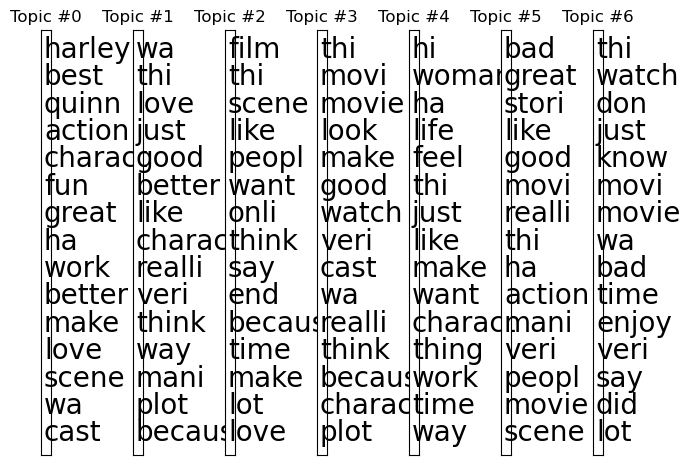

In [7]:
fontsize_base = 20

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1) 
    plt.ylim(0, num_top_words + 0.5) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1] 
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)

plt.tight_layout()
plt.show()